In [ ]:
%pip install tensorflow opencv-python matplotlib

In [ ]:
%pip install tensorflow opencv-python matplotlib

In [ ]:
%pip list

In [4]:
import tensorflow as tf
import os


2024-04-20 22:51:16.980122: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 22:51:16.981846: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 22:51:17.057140: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 22:51:17.484528: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 22:51:18.793760: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [5]:
# This piece of code if for configuring gpu utilisation. I  don't have a dedicated gpu so i have this commented out.

# limit gpu consumption to avoid errors like 'out of memory error'
# gpus=tf.config.experimental.list_physical_devices('GPU')
# for unitGPU in gpus:
#     tf.config.experimental.set_memory_growth(unitGPU,True)

# gpus=tf.config.experimental.list_physical_devices('GPU')
# print(gpus)

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [7]:
train_data_dir='PCOS_Train'
os.listdir(train_data_dir)

['healthy', 'unhealthy']

In [8]:

imageExts=['jpeg','jpg','bmp','png']
for imageDir in os.listdir(train_data_dir):
    for image in os.listdir(os.path.join(train_data_dir,imageDir)):
        imgPath=os.path.join(train_data_dir, imageDir,image)
        try: 
            img=cv2.imread(imgPath)
            ext=imghdr.what(imgPath)
            if ext not in imageExts:
                print('not a compatible file format')
                os.remove(imgPath)
        except Exception as e:
            print('some problem')

[[[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 ...

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]

 [[10 10 10]
  [10 10 10]
  [11 11 11]
  ...
  [11 11 11]
  [11 11 11]
  [11 11 11]]]
(300, 300, 3)


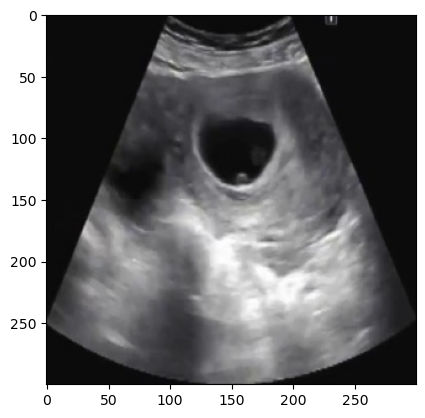

In [9]:
# an example of how the images are inside the folders healthy and unhealthy
exampleImage=cv2.imread(os.path.join(train_data_dir,'healthy', '1image40.jpg'))
print(exampleImage)
print(exampleImage.shape)
# plt.imshow(exampleImage)
plt.imshow(cv2.cvtColor(exampleImage, cv2.COLOR_BGR2RGB))


In [ ]:
tf.data.Dataset??

In [11]:
trainData=tf.keras.utils.image_dataset_from_directory('PCOS_Train')
dataIterator=trainData.as_numpy_iterator()
batch=dataIterator.next()
batch



Found 3200 files belonging to 2 classes.


(array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [6.07343750e+01, 6.07343750e+01, 6.07343750e+01],
          [4.88886719e+01, 4.88886719e+01, 4.88886719e+01],
          [3.37363281e+01, 3.37363281e+01, 3.37363281e+01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [7.77807922e+01, 7.77807922e+01, 7.77807922e+01],
          [7.36513062e+01, 7.36513062e+01, 7.36513062e+01],
          [6.66638184e+01, 6.66638184e+01, 6.66638184e+01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [8.14009705e+01, 8.14009705e+01, 8.1400

In [12]:
# each batch is of size 32 and has 2 parts. the first part is the images and the second part is the labels
batch[0]
batch[0].shape
batch[1]

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

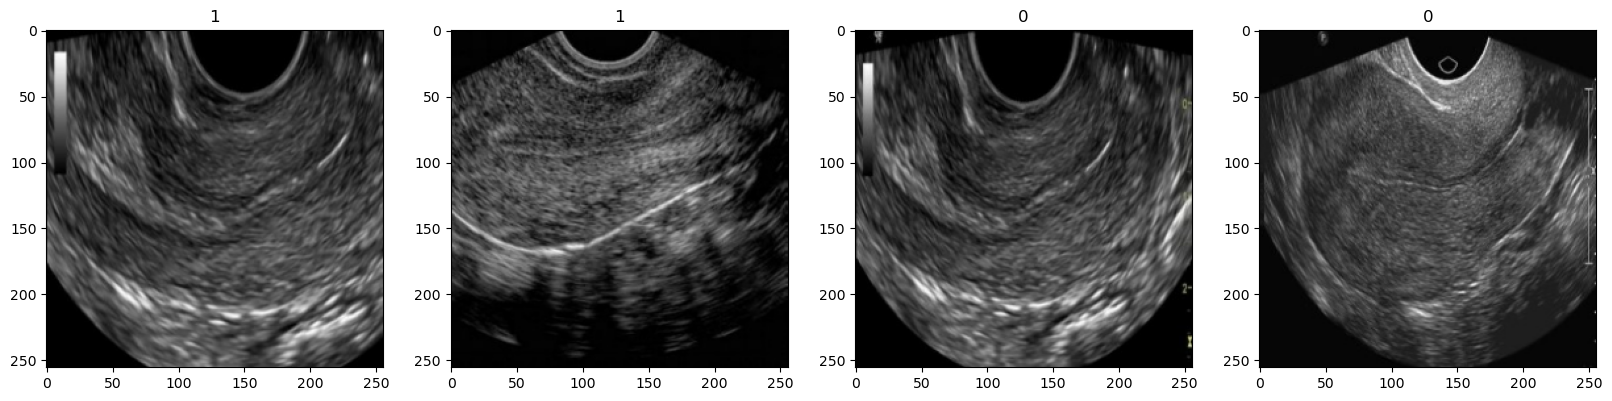

In [13]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    # print(os.path.abspath(img))

In [14]:
for i, class_name in enumerate(trainData.class_names):
    print(f"Label for class {class_name}: {i}")

Label for class healthy: 0
Label for class unhealthy: 1


In [15]:
trainData=trainData.map(lambda x,y: (x/255,y))

In [16]:
scaledIterator=trainData.as_numpy_iterator()

In [17]:
scaledIterator.next()[0].max()

1.0

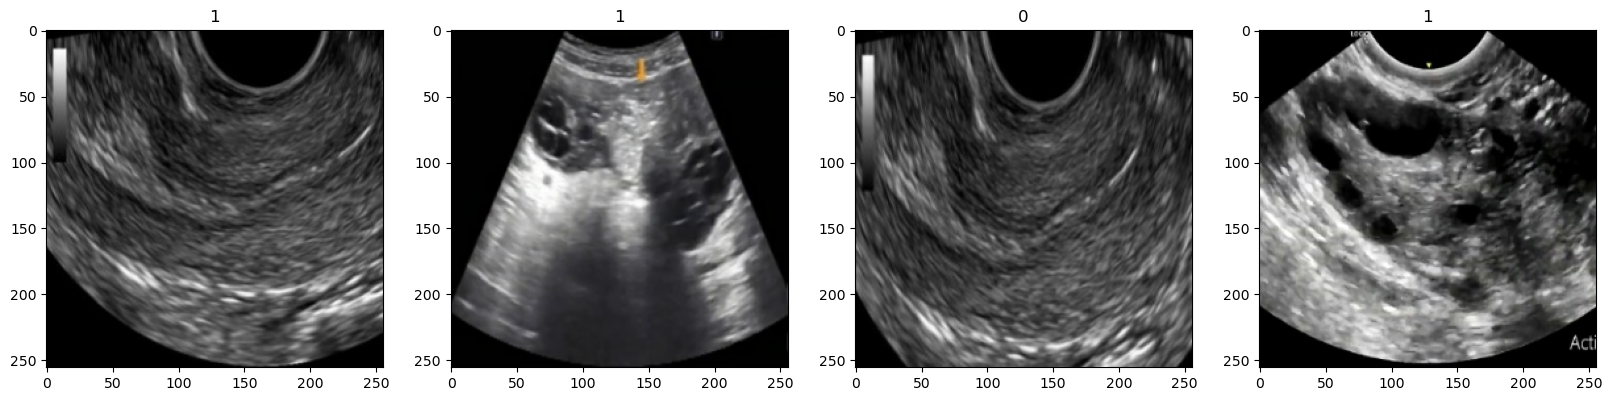

In [18]:
batch=scaledIterator.next()
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    # print(os.path.abspath(img))

In [19]:
batch[0].max()
batch[0].min()

0.0

In [20]:
len(trainData)

100

In [21]:
trainSize=int(len(trainData)*.7)
valSize=int(len(trainData)*.2)
testSize=int(len(trainData)*.1)

In [22]:
valSize
trainSize
testSize

10

In [23]:
train=trainData.take(trainSize)
val=trainData.skip(trainSize).take(valSize)
test=trainData.skip(trainSize+valSize).take(testSize)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model=Sequential()

In [ ]:
MaxPooling2D??

In [26]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/satyarth/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# we can use different optimizers. I have used adam but there are several available. In order to check the list of optimizers available with tensorflow run the below line of code. When you put a dot after optimizers it will show the list available

# tf.optimizers

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
logDirectory='logs'

In [32]:
tensorboardCallback=tf.keras.callbacks.TensorBoard(log_dir=logDirectory)

In [33]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboardCallback])

Epoch 1/20


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.6860 - loss: 0.6298

2024-04-20 23:49:21.386248: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 353ms/step - accuracy: 0.6862 - loss: 0.6292 - val_accuracy: 0.6953 - val_loss: 0.5385
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.7408 - loss: 0.5192

2024-04-20 23:49:45.650540: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 343ms/step - accuracy: 0.7407 - loss: 0.5191 - val_accuracy: 0.7422 - val_loss: 0.4850
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.7454 - loss: 0.4828

2024-04-20 23:50:10.030658: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.7454 - loss: 0.4827 - val_accuracy: 0.7672 - val_loss: 0.4479
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.7794 - loss: 0.4465

2024-04-20 23:50:34.462915: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.7793 - loss: 0.4467 - val_accuracy: 0.7172 - val_loss: 0.4741
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.7958 - loss: 0.4238

2024-04-20 23:51:15.648439: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - accuracy: 0.7957 - loss: 0.4238 - val_accuracy: 0.7437 - val_loss: 0.4475
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.8079 - loss: 0.3861

2024-04-20 23:51:40.411114: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 351ms/step - accuracy: 0.8079 - loss: 0.3861 - val_accuracy: 0.7531 - val_loss: 0.4695
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8199 - loss: 0.3621

2024-04-20 23:52:04.828487: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.8198 - loss: 0.3621 - val_accuracy: 0.6844 - val_loss: 0.5325
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.8290 - loss: 0.3420

2024-04-20 23:52:29.689871: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 352ms/step - accuracy: 0.8290 - loss: 0.3420 - val_accuracy: 0.7531 - val_loss: 0.4668
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.8306 - loss: 0.3274

2024-04-20 23:52:54.196555: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 347ms/step - accuracy: 0.8306 - loss: 0.3274 - val_accuracy: 0.7906 - val_loss: 0.4775
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8664 - loss: 0.2931

2024-04-20 23:53:18.521622: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.8663 - loss: 0.2932 - val_accuracy: 0.7594 - val_loss: 0.4611
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8586 - loss: 0.2881

2024-04-20 23:53:42.919212: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.8586 - loss: 0.2882 - val_accuracy: 0.7734 - val_loss: 0.5460
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.8714 - loss: 0.2709

2024-04-20 23:54:07.144314: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.8713 - loss: 0.2709 - val_accuracy: 0.7688 - val_loss: 0.5111
Epoch 13/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8956 - loss: 0.2345

2024-04-20 23:54:31.578481: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.8955 - loss: 0.2347 - val_accuracy: 0.7750 - val_loss: 0.5056
Epoch 14/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9053 - loss: 0.2273

2024-04-20 23:55:12.677889: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - accuracy: 0.9051 - loss: 0.2274 - val_accuracy: 0.7578 - val_loss: 0.5316
Epoch 15/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.9085 - loss: 0.2109

2024-04-20 23:55:54.708342: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 363ms/step - accuracy: 0.9084 - loss: 0.2109 - val_accuracy: 0.8062 - val_loss: 0.5406
Epoch 16/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9155 - loss: 0.1903

2024-04-20 23:56:19.029107: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.9154 - loss: 0.1904 - val_accuracy: 0.7656 - val_loss: 0.5924
Epoch 17/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9080 - loss: 0.2044

2024-04-20 23:56:43.580249: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.9081 - loss: 0.2041 - val_accuracy: 0.7844 - val_loss: 0.6065
Epoch 18/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9247 - loss: 0.1695

2024-04-20 23:57:24.518525: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 346ms/step - accuracy: 0.9246 - loss: 0.1696 - val_accuracy: 0.7531 - val_loss: 0.6098
Epoch 19/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9223 - loss: 0.1730

2024-04-20 23:57:48.799508: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 345ms/step - accuracy: 0.9225 - loss: 0.1728 - val_accuracy: 0.7578 - val_loss: 0.6007
Epoch 20/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9501 - loss: 0.1302

2024-04-20 23:58:13.211218: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - accuracy: 0.9500 - loss: 0.1304 - val_accuracy: 0.7500 - val_loss: 0.6819


In [34]:
hist.history

{'accuracy': [0.7035714387893677,
  0.7334821224212646,
  0.7517856955528259,
  0.7723214030265808,
  0.7839285731315613,
  0.8098214268684387,
  0.8178571462631226,
  0.8254464268684387,
  0.8321428298950195,
  0.859375,
  0.8580357432365417,
  0.8691964149475098,
  0.8843749761581421,
  0.8888393044471741,
  0.9053571224212646,
  0.9102678298950195,
  0.9156249761581421,
  0.9191964268684387,
  0.9352678656578064,
  0.9401785731315613],
 'loss': [0.5823419690132141,
  0.5115967988967896,
  0.4793255925178528,
  0.4586465656757355,
  0.4216708540916443,
  0.3835721015930176,
  0.3645699918270111,
  0.3374910056591034,
  0.3294650614261627,
  0.30579623579978943,
  0.294431209564209,
  0.27392879128456116,
  0.2477443367242813,
  0.2382606714963913,
  0.2124432474374771,
  0.2016507089138031,
  0.18507926166057587,
  0.1766146868467331,
  0.16225625574588776,
  0.14705701172351837],
 'val_accuracy': [0.6953125,
  0.7421875,
  0.7671874761581421,
  0.7171875238418579,
  0.74374997615814

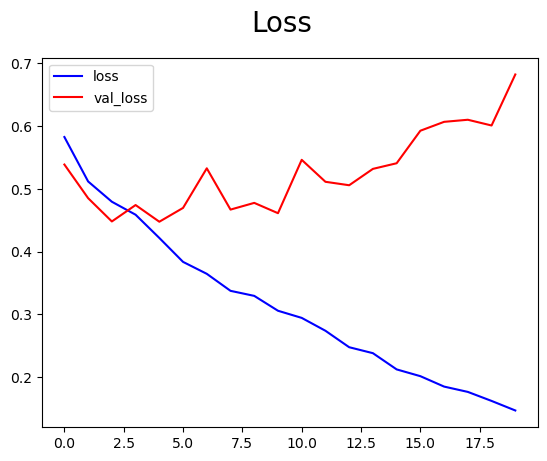

In [35]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

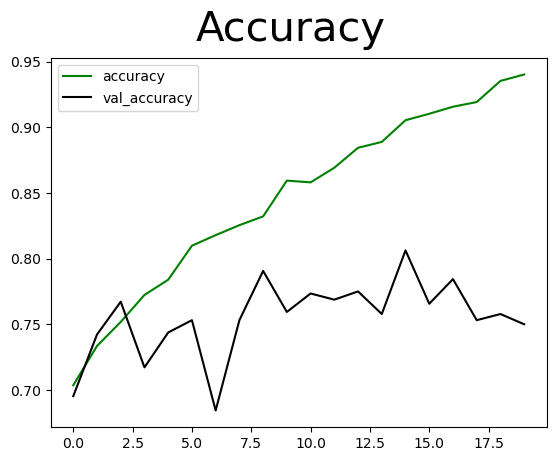

In [39]:
secondFig=plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='black', label='val_accuracy')
secondFig.suptitle("Accuracy", fontsize=30)
plt.legend(loc="upper left")
plt.show()

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
precision=Precision()
recall=Recall()
accuracy=BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yPred=model.predict(x)
    precision.update_state(y,yPred)
    recall.update_state(y, yPred)
    accuracy.update_state(y, yPred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


2024-04-21 00:58:13.453121: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


2024-04-21 00:58:15.171379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [44]:
print(f"Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}")

Precision:0.8559321761131287, Recall:0.7769230604171753, Accuracy:0.737500011920929
